# Imports

In [140]:
# imports necessarios
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import time
from statistics import mean, stdev
from math import sqrt

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

# Cria o mapa

In [2]:
# make the dict where the key is associated with his neighbors
mapa = {}
for i in range(0,60):
    for j in range(0,60):
        mapa[(i,j)] = {(i+1,j):1, (i-1,j):1, (i,j+1):1, (i,j-1):1}
        
grafo = UndirectedGraph(mapa)

# Classe do Problema

In [197]:
class RobotProblem(Problem):

    """Problema para encontrar o goal saindo de uma posicao (x,y) com um robo."""

    def __init__(self, initial, goal, mapa, graph):
        Problem.__init__(self, initial, goal)
        self.mapa = mapa
        self.graph = graph

    def actions(self, actual_pos):
        """The actions at a graph node are just its neighbors."""
        neighbors = list(self.graph.get(actual_pos).keys())
        valid_actions = []
        for act in neighbors:
            if act[0] == 0 or act[0] == 60 or act[1] == 0 or act[1] == 60:
                i = 1
            elif (act[0] == 20 and (0<= act[1] <= 40)):
                i = 2
            elif (act[0] == 40 and (20<= act[1] <= 60)):
                i = 3
            else:
                valid_actions.append(act)
                
        return valid_actions

    def result(self, state, action):
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, state1, action, state2):
        return cost_so_far + 1

    def goal_test(self, state):
        if state[0] == self.goal[0] and state[1] == self.goal[1]:
            return True
        else:
            return False

# Busca nao supervisionada: DFS

## Calculo do custo da busca e o caminho percorrido

In [198]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = depth_first_graph_search(robot_problem)
print("Custo da busca DFS: " + str(node.path_cost))

Custo da busca DFS: 1084


In [199]:
list_nodes = []
for n in node.path():
    list_nodes.append(n.state)

In [200]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

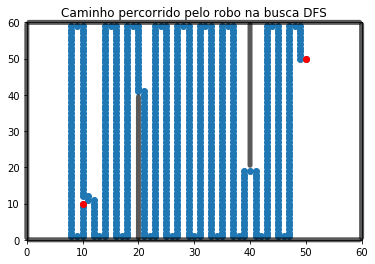

In [201]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca DFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Calculo do tempo gasto pela DFS com inicio em (10,10) e fim em (50,50)

In [11]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)

times = []
for i in range(0,1000):
    start = time.time()
    node = depth_first_graph_search(robot_problem)
    end = time.time()
    times.append(end - start)

Media do tempo gasto para a busca DFS: 1.009512909412384
Desvio padrao do tempo gasto para a busca DFS: 0.14409295994680466
Intervalo de confiança para a busca DFS: (1.0005819352271286,1.0184438835976395)


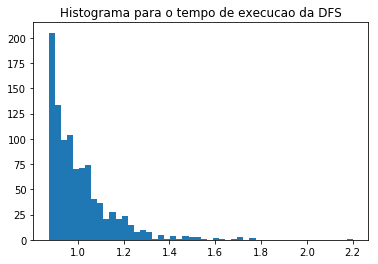

In [64]:
media_dfs = mean(times)
desvio_dfs = stdev(times)
intervalo_conf = '(' + str( media_dfs - 1.96 * (desvio_dfs / (len(times)) ** (1/2)) ) + ',' + str( media_dfs + 1.96 * (desvio_dfs / (len(times)) ** (1/2)) ) + ')'
print("Media do tempo gasto para a busca DFS: " + str(media_dfs))
print("Desvio padrao do tempo gasto para a busca DFS: " + str(desvio_dfs))
print("Intervalo de confiança para a busca DFS: " + intervalo_conf)
fig = plt.figure()
plt.hist(times,bins=50)
plt.title('Histograma para o tempo de execucao da DFS')
plt.show()

## Projecao da relacao entre distancia em linha reta e tempo para a DFS

In [79]:
goal_pos = (50,50)
x = []
y = []
for i in range(5,50):
    for j in range(5,50):
        if i != 20 and i != 40:
            init_pos = (i,i)
            distancia_linha_reta = sqrt( (goal_pos[0] - init_pos[0]) ** 2 + (goal_pos[1] - init_pos[1]) ** 2)
            robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
            start = time.time()
            node = depth_first_graph_search(robot_problem)
            end = time.time()
            x.append(distancia_linha_reta)
            y.append(end - start)

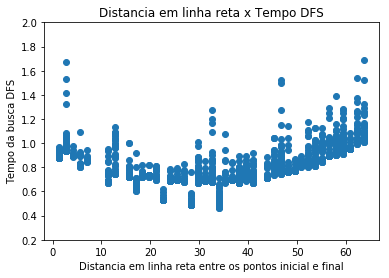

In [90]:
fig = plt.figure()
plt.scatter(x,y)
plt.ylim(0.2, 2)
plt.title("Distancia em linha reta x Tempo DFS")
plt.xlabel("Distancia em linha reta entre os pontos inicial e final")
plt.ylabel("Tempo da busca DFS")
plt.show()

# Busca nao supervisionada: BFS

## Calculo do custo da busca e o caminho percorrido

In [203]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = breadth_first_graph_search(robot_problem)
print("Custo da busca BFS: " + str(node.path_cost))

Custo da busca BFS: 124


In [205]:
list_nodes = []
for n in node.path():
    list_nodes.append(n.state)
    
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

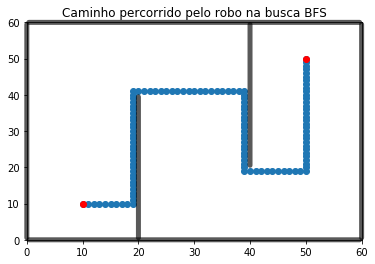

In [207]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca BFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Calculo do tempo gasto pela BFS com inicio em (10,10) e fim em (50,50)

In [91]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)

times = []
for i in range(0,1000):
    start = time.time()
    node = breadth_first_graph_search(robot_problem)
    end = time.time()
    times.append(end - start)

Media do tempo gasto para a busca BFS: 0.05700565814971924
Desvio padrao do tempo gasto para a busca BFS: 0.009455976054136637
Intervalo de confiança para a busca BFS: (0.056419570681830004,0.05759174561760847)


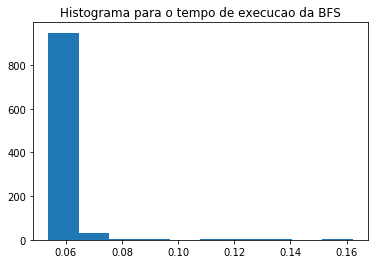

In [100]:
media_bfs = mean(times)
desvio_bfs = stdev(times)
intervalo_conf = '(' + str( media_bfs - 1.96 * (desvio_bfs / (len(times)) ** (1/2)) ) + ',' + str( media_bfs + 1.96 * (desvio_bfs / (len(times)) ** (1/2)) ) + ')'
print("Media do tempo gasto para a busca BFS: " + str(media_bfs))
print("Desvio padrao do tempo gasto para a busca BFS: " + str(desvio_bfs))
print("Intervalo de confiança para a busca BFS: " + intervalo_conf)
fig = plt.figure()
plt.hist(times,bins=10)
plt.title('Histograma para o tempo de execucao da BFS')
plt.show()

## Projecao da relacao entre distancia em linha reta e tempo para a BFS

In [102]:
goal_pos = (50,50)
x = []
y = []
for i in range(5,50):
    for j in range(5,50):
        if i != 20 and i != 40:
            init_pos = (i,i)
            distancia_linha_reta = sqrt( (goal_pos[0] - init_pos[0]) ** 2 + (goal_pos[1] - init_pos[1]) ** 2)
            robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
            start = time.time()
            node = breadth_first_graph_search(robot_problem)
            end = time.time()
            x.append(distancia_linha_reta)
            y.append(end - start)

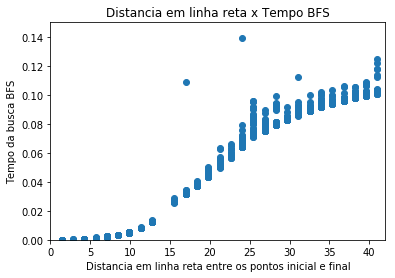

In [108]:
fig = plt.figure()
plt.scatter(x,y)
plt.xlim(0,42)
plt.ylim(0, 0.15)
plt.title("Distancia em linha reta x Tempo BFS")
plt.xlabel("Distancia em linha reta entre os pontos inicial e final")
plt.ylabel("Tempo da busca BFS")
plt.show()